In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import re
from urllib.parse import urlparse

In [2]:
data = pd.read_csv('../data/in/native_ad_data.csv')

Let's start with some data cleanup: stripdown dates

In [3]:
data['date'] = pd.to_datetime(data['date'])

In [4]:
data['date'].dtype

dtype('<M8[ns]')

In [5]:
data = data.set_index('date')

In [6]:
data['date'] = data.index.date

In [7]:
data.head()

,_id,headline,link,img,provider,source,img_file,final_link,orig_article,date
date,,,,,,,,,,
2017-03-27 12:59:09.279,ObjectId(58d90ce706e10d04f7e1b3d8),20 Cool Moments From Joe Biden’s Time In Office,http://scribol.com/a/news-and-politics/ways-jo...,https://console.brax-cdn.com/creatives/98c6400...,taboola,http://tmz.com,./imgs/876aa5e83f6fb81a81908db3c02fdcc00d44400...,http://scribol.com/a/news-and-politics/ways-jo...,NaN,2017-03-27
2017-03-27 12:59:09.819,ObjectId(58d90ce706e10d04f7e1b3d9),Troubled News Anchor Does The Unthinkable On Air,http://www.trend-chaser.com/entertainment/the-...,https://console.brax-cdn.com/creatives/b86bbc0...,taboola,http://tmz.com,./imgs/bab1037467f1385cd865c48029db808b03a151d...,http://www.trend-chaser.com/entertainment/the-...,NaN,2017-03-27
2017-03-27 12:59:10.750,ObjectId(58d90ce706e10d04f7e1b3da),It's Almost Hard To Fathom What He look's Like...,http://www.journalistate.com/popular/big-holly...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,./imgs/feeb5be5a9758fcca8cef21b6fb842ccc839476...,http://www.journalistate.com/popular/big-holly...,NaN,2017-03-27
2017-03-27 12:59:11.430,ObjectId(58d90ce706e10d04f7e1b3db),Troubled News Anchor Does The Unthinkable On Air,http://www.trend-chaser.com/entertainment/the-...,https://console.brax-cdn.com/creatives/b86bbc0...,taboola,http://tmz.com,./imgs/bab1037467f1385cd865c48029db808b03a151d...,http://www.trend-chaser.com/entertainment/the-...,NaN,2017-03-27
2017-03-27 12:59:11.510,ObjectId(58d90ce706e10d04f7e1b3dc),Try NOT Gasp When You See Who Queen Latifah Is...,http://zcretuzft.iflmylife.com/entertainment/o...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,./imgs/d75401b962746864063b51f164633ffeb93931d...,http://www.iflmylife.com/entertainment/other-h...,NaN,2017-03-27


The one's from zergnet all have some newlines we need to get rid of and they appear to have concatenated the headline with the provider. So let's clean those up.

In [8]:
data['headline'] = data['headline'].apply(lambda x: re.sub('(?<=[a-z])\.?([A-Z](.*))' , '', x.strip()))
data.head()

,_id,headline,link,img,provider,source,img_file,final_link,orig_article,date
date,,,,,,,,,,
2017-03-27 12:59:09.279,ObjectId(58d90ce706e10d04f7e1b3d8),20 Cool Moments From Joe Biden’s Time In Office,http://scribol.com/a/news-and-politics/ways-jo...,https://console.brax-cdn.com/creatives/98c6400...,taboola,http://tmz.com,./imgs/876aa5e83f6fb81a81908db3c02fdcc00d44400...,http://scribol.com/a/news-and-politics/ways-jo...,NaN,2017-03-27
2017-03-27 12:59:09.819,ObjectId(58d90ce706e10d04f7e1b3d9),Troubled News Anchor Does The Unthinkable On Air,http://www.trend-chaser.com/entertainment/the-...,https://console.brax-cdn.com/creatives/b86bbc0...,taboola,http://tmz.com,./imgs/bab1037467f1385cd865c48029db808b03a151d...,http://www.trend-chaser.com/entertainment/the-...,NaN,2017-03-27
2017-03-27 12:59:10.750,ObjectId(58d90ce706e10d04f7e1b3da),It's Almost Hard To Fathom What He look's Like...,http://www.journalistate.com/popular/big-holly...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,./imgs/feeb5be5a9758fcca8cef21b6fb842ccc839476...,http://www.journalistate.com/popular/big-holly...,NaN,2017-03-27
2017-03-27 12:59:11.430,ObjectId(58d90ce706e10d04f7e1b3db),Troubled News Anchor Does The Unthinkable On Air,http://www.trend-chaser.com/entertainment/the-...,https://console.brax-cdn.com/creatives/b86bbc0...,taboola,http://tmz.com,./imgs/bab1037467f1385cd865c48029db808b03a151d...,http://www.trend-chaser.com/entertainment/the-...,NaN,2017-03-27
2017-03-27 12:59:11.510,ObjectId(58d90ce706e10d04f7e1b3dc),Try NOT Gasp When You See Who Queen Latifah Is...,http://zcretuzft.iflmylife.com/entertainment/o...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,./imgs/d75401b962746864063b51f164633ffeb93931d...,http://www.iflmylife.com/entertainment/other-h...,NaN,2017-03-27


In [9]:
data['img_file'] = data['img_file'].apply(lambda x: re.sub('\.\/imgs\/' , '', str(x).strip()))
data['img_file']


date
2017-03-27 12:59:09.279    876aa5e83f6fb81a81908db3c02fdcc00d444000.png
2017-03-27 12:59:09.819    bab1037467f1385cd865c48029db808b03a151d2.png
2017-03-27 12:59:10.750    feeb5be5a9758fcca8cef21b6fb842ccc8394766.jpg
2017-03-27 12:59:11.430    bab1037467f1385cd865c48029db808b03a151d2.png
2017-03-27 12:59:11.510    d75401b962746864063b51f164633ffeb93931d3.jpg
2017-03-27 12:59:12.607    9eb97ec8e2851dd2fd90c3e28b56ff23b72790d2.jpg
2017-03-27 12:59:12.848    d75401b962746864063b51f164633ffeb93931d3.jpg
2017-03-27 12:59:12.984    4d1b9f3e2b22d301db93b301a63c3f25b3ea7904.png
2017-03-27 12:59:13.038    d3a3f2f50c84529c08bb8314ae3aa66280f0cbc7.png
2017-03-27 12:59:14.659    45d1417bbb2868b7ab6771f4edc7feb048f2068b.png
2017-03-27 12:59:15.114    e2bb63d58e09bae569a90f64de24c93a2d008e34.jpg
2017-03-27 12:59:15.237    f70f91d2ebf37e35480fe4f689477406adf9243e.jpg
2017-03-27 12:59:15.614    ab914b86682795c6d6624707b22b06f88f0e551a.jpg
2017-03-27 12:59:16.168    76544095ea7e1e5f74e9d210dab401d2

OK, that's better.

Do we have any null values?

In [10]:
for col in data.columns:
    print((col, sum(data[col].isnull())))

('_id', 0)
('headline', 0)
('link', 0)
('img', 0)
('provider', 0)
('source', 0)
('img_file', 0)
('final_link', 0)
('orig_article', 59776)
('date', 0)


For future reference, we have a small number of img_files that are null (probably because the scraper errored out grabbing the file). For the most part, that's pretty good.

In [11]:
data.describe()

,_id,headline,link,img,provider,source,img_file,final_link,orig_article,date
count,129399,129399,129399,129399,129399,129399,129399,129399,69623,129399
unique,129399,18022,43315,23843,4,24,23866,36713,6670,93
top,ObjectId(590b14929e1e2a255d8c8605),Here’s Why Guys Are Obsessed With This Underwear…,https://grizly.com/lifestyle/guy-turned-backya...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,db07ff3401037653d665822c5a78617464fe4ef8.jpg,https://grizly.com/lifestyle/guy-turned-backya...,http://www.tmz.com/2017/06/02/kathy-griffin-co...,2017-06-24
freq,1,996,588,621,59474,24167,621,588,167,3125


Already we can see some interesting trends here. Out of 64147 unique records, only 10260 of the headlines are unique, but 19212 of the links are unique and 12709 of the image files are unique (assuming for sure that there were issues with downloading images, but more on that later). So it seems already that there are content links which might reuse the same headline, or image for different destination articles. Let's try to dig into that.

Also, becuase we want to inspect the hosts from which the articles and images are coming from, let's parse those out in the data.

In [12]:
data['img_host'] = data['img'].apply(lambda x: urlparse(x).netloc)

In [13]:
data['link_host'] = data['final_link'].apply(lambda x: urlparse(x).netloc)

Next, let's classify each site by a very relaxed set of tags based on perceived political bias. I might be a little off on some, I referenced https://www.allsides.com/ where possible, but that was not entirely helpful in all cases. Otherwise, I just went with my own idea of where I felt a site fell on the political spectrum (e.g., left, right, or center). There is also a tag for tabloids, or primarily sites that probably don't really have an editorial perspective so much as a desire to publish whatever gets the most traffic.

In [14]:
left = ['http://www.politico.com/magazine/', 'https://www.washingtonpost.com/', 'http://www.huffingtonpost.com/', 'http://gothamist.com/news', 'http://www.metro.us/news', 'http://www.politico.com/politics', 'http://www.nydailynews.com/news', 'http://www.thedailybeast.com/']
right = ['http://www.breitbart.com', 'http://www.rt.com', 'https://nypost.com/news/', 'http://www.infowars.com/', 'https://www.therebel.media/news', 'http://observer.com/latest/']
center = ['http://www.ibtimes.com/', 'http://www.businessinsider.com/', 'http://thehill.com']
tabloid = ['http://tmz.com', 'http://www.dailymail.co.uk/', 'https://downtrend.com/', 'http://reductress.com/', 'http://preventionpulse.com/', 'http://elitedaily.com/', 'http://worldstarhiphop.com/videos/']

In [15]:
def get_classification(source):
    if source in left:
        return 'left'
    if source in right:
        return 'right'
    if source in center:
        return 'center'
    if source in tabloid:
        return 'tabloid'

In [16]:
data['source_class'] = data['source'].apply(lambda x: get_classification(x))

In [17]:
data.head()

,_id,headline,link,img,provider,source,img_file,final_link,orig_article,date,img_host,link_host,source_class
date,,,,,,,,,,,,,
2017-03-27 12:59:09.279,ObjectId(58d90ce706e10d04f7e1b3d8),20 Cool Moments From Joe Biden’s Time In Office,http://scribol.com/a/news-and-politics/ways-jo...,https://console.brax-cdn.com/creatives/98c6400...,taboola,http://tmz.com,876aa5e83f6fb81a81908db3c02fdcc00d444000.png,http://scribol.com/a/news-and-politics/ways-jo...,NaN,2017-03-27,console.brax-cdn.com,scribol.com,tabloid
2017-03-27 12:59:09.819,ObjectId(58d90ce706e10d04f7e1b3d9),Troubled News Anchor Does The Unthinkable On Air,http://www.trend-chaser.com/entertainment/the-...,https://console.brax-cdn.com/creatives/b86bbc0...,taboola,http://tmz.com,bab1037467f1385cd865c48029db808b03a151d2.png,http://www.trend-chaser.com/entertainment/the-...,NaN,2017-03-27,console.brax-cdn.com,www.trend-chaser.com,tabloid
2017-03-27 12:59:10.750,ObjectId(58d90ce706e10d04f7e1b3da),It's Almost Hard To Fathom What He look's Like...,http://www.journalistate.com/popular/big-holly...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,feeb5be5a9758fcca8cef21b6fb842ccc8394766.jpg,http://www.journalistate.com/popular/big-holly...,NaN,2017-03-27,cdn.taboolasyndication.com,www.journalistate.com,tabloid
2017-03-27 12:59:11.430,ObjectId(58d90ce706e10d04f7e1b3db),Troubled News Anchor Does The Unthinkable On Air,http://www.trend-chaser.com/entertainment/the-...,https://console.brax-cdn.com/creatives/b86bbc0...,taboola,http://tmz.com,bab1037467f1385cd865c48029db808b03a151d2.png,http://www.trend-chaser.com/entertainment/the-...,NaN,2017-03-27,console.brax-cdn.com,www.trend-chaser.com,tabloid
2017-03-27 12:59:11.510,ObjectId(58d90ce706e10d04f7e1b3dc),Try NOT Gasp When You See Who Queen Latifah Is...,http://zcretuzft.iflmylife.com/entertainment/o...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,d75401b962746864063b51f164633ffeb93931d3.jpg,http://www.iflmylife.com/entertainment/other-h...,NaN,2017-03-27,cdn.taboolasyndication.com,www.iflmylife.com,tabloid


We're working with a lot of duplicates, I'm sure. Let's remove anything where the headline, link, img, provider, source, img_file, final_link are the same. This should only give us back the unique records we're looking for.

In [18]:
deduped = data.drop_duplicates(subset=['headline', 'link', 'img', 'provider', 'source', 'img_file', 'final_link'], keep=False)

In [19]:
deduped.describe()

,_id,headline,link,img,provider,source,img_file,final_link,orig_article,date,img_host,link_host,source_class
count,43630,43630,43630,43630,43630,43630,43630,43630,25177,43630,43630,43630,43630
unique,43630,15219,35541,19311,4,24,19314,30873,5195,93,568,2196,4
top,ObjectId(590ea6229e1e2a473fde6fa4),Nicole Kidman's Yacht Is Far From You'd Expect,http://topictracker.online/?utm_campaign=us-tb...,http://cdn.taboolasyndication.com/libtrc/stati...,taboola,http://tmz.com,f18167ca58fee4ae691a28ecd39b0c1afe2689e4.jpg,http://www.zergnet.com/news/694817/kim-kardash...,http://elitedaily.com/women/elite-daily-wants-...,2017-07-08,images.outbrain.com,www.zergnet.com,tabloid
freq,1,376,110,368,13431,5070,368,126,51,1353,12259,7257,16005


And let's just check on those null values again...

In [20]:
for col in deduped.columns:
    print((col, sum(deduped[col].isnull())))

('_id', 0)
('headline', 0)
('link', 0)
('img', 0)
('provider', 0)
('source', 0)
('img_file', 0)
('final_link', 0)
('orig_article', 18453)
('date', 0)
('img_host', 0)
('link_host', 0)
('source_class', 0)


Just to be sure it's doing what we assume it's doing, let's just remove duplicates based on headline. I assume this would leave us with far less records as I don't doubt that the same headline migh appear on another website.

In [21]:
deduped_hl = data.drop_duplicates(subset=['headline'], keep=False)

In [22]:
deduped_hl.describe()

,_id,headline,link,img,provider,source,img_file,final_link,orig_article,date,img_host,link_host,source_class
count,8466,8466,8466,8466,8466,8466,8466,8466,4509,8466,8466,8466,8466
unique,8466,8466,7787,8036,4,24,8009,7793,2135,93,400,1601,4
top,ObjectId(594b4de69e1e2a1bd4a47c8d),The beaches on these islands are the best,http://advertisementfeature.cnn.com/2017/yanmar,http://cdn.taboolasyndication.com/libtrc/stati...,outbrain,http://www.politico.com/magazine/,nan,http://www.homeadvisor.com/?utm_source=Outbrain,http://www.businessinsider.com/dave-mcclure-no...,2017-07-01,images.outbrain.com,www.zergnet.com,left
freq,1,1,9,8,4166,1347,31,10,28,264,4168,884,3443


And sure enought we're only left with 8466 records if we only want records with unique headlines.

In [23]:
deduped_hl_source = data.drop_duplicates(subset=['headline', 'source'], keep=False)

In [24]:
deduped_hl_source.describe()

,_id,headline,link,img,provider,source,img_file,final_link,orig_article,date,img_host,link_host,source_class
count,13270,13270,13270,13270,13270,13270,13270,13270,7028,13270,13270,13270,13270
unique,13270,11376,11438,11527,4,24,11492,11450,2979,93,526,1814,4
top,ObjectId(590b14929e1e2a255d8c8605),5 Steps To Raising A Viking Child,https://ad.doubleclick.net/ddm/trackclk/N6296....,http://cdn.taboola.com/static/3c/3c8c4a76-66d5...,taboola,http://www.politico.com/magazine/,nan,https://www.verizon.com/home/fios-gigabit-conn...,http://www.businessinsider.com/dave-mcclure-no...,2017-07-01,images.outbrain.com,www.zergnet.com,left
freq,1,6,21,9,6218,1550,52,21,41,392,5815,980,5543


But that's enough of that. Let's return to the unique records we're interested in in `deduped`. But first, let's take a look at the rate of success for our record collection.

In [25]:
(43630/129399)*100

33.71741667246269

Crud, doing a harvest yields results where only 33% of our sample is worth examining further. 

Note: We might still be interested in the duplicates if we take a look at the distribution of those records over time. Below, we should probably reduce the date of collection to a week or maybe a 3 day sequence and only remove duplicates if they happened within that period. Which might tell us something about content being shuffled in and out by the provider.

Let's get the top 10 headlines grouped by img

In [26]:
deduped['headline'].groupby(deduped['img']).value_counts().nlargest(10)

img                                                                                                         headline                                                                                                 
http://cdn.taboolasyndication.com/libtrc/static/thumbnails/21a99ebd78f2af61aeeec2074e0376c0.jpg             Nicole Kidman's Yacht Is Far From You'd Expect                                                               368
https://revcontent-p0.s3.amazonaws.com/content/images/1495720487.jpg                                        Triple Your Accuracy With This Weird Shooting Technique Used By Seal Snipers                                 238
http://cdn.taboolasyndication.com/libtrc/static/thumbnails/0dba2430aca9e98e05160cfd6e6d3171.jpg             Here Is How You Upgrade To Business Class                                                                    227
http://cdn.taboolasyndication.com/libtrc/static/thumbnails/2e967b6db0813815a899401b4746a749.jpg             Stairlifts are 

But hang on. let's just see what the top headlines are. There's certainly overlap, but it's not a one to one relationship between headlines and their images (or at least maybe it's the same image, but coming from a different URL).

In [27]:
deduped['headline'].value_counts().nlargest(10)

Nicole Kidman's Yacht Is Far From You'd Expect                                                               376
Triple Your Accuracy With This Weird Shooting Technique Used By Seal Snipers                                 260
Forget Social Security if you Own a Home (Do This)                                                           231
Here Is How You Upgrade To Business Class                                                                    227
Stairlifts are disrupting the multi-billion dollar retirement home industry - keeping seniors independent    200
Tiger Woods' Yacht Is Far From You'd Expect                                                                  181
Watch Obama's Face at 0:33. This Leaked Video Will Destroy Obama's Legacy                                    169
New Jersey Landlines Get Replaced (But Not With Cell Phones)                                                 161
Best Senior Living Communities Of 2017! View Pricing Here & Compare                             

Note: perhaps something we will want to look into is how many different headline, image permutations there are. I am particularly interested in the reuse of images across different headlines.

In [28]:
deduped['source'].value_counts().nlargest(25)

http://tmz.com                        5070
http://elitedaily.com/                4873
http://www.politico.com/magazine/     3151
https://www.washingtonpost.com/       2961
http://www.infowars.com/              2561
http://www.thedailybeast.com/         2455
http://www.breitbart.com              2443
https://downtrend.com/                2421
http://www.ibtimes.com/               2323
http://thehill.com                    2001
http://www.businessinsider.com/       1984
http://www.rt.com                     1819
http://www.politico.com/politics      1708
http://worldstarhiphop.com/videos/    1292
http://www.dailymail.co.uk/           1159
http://reductress.com/                1082
https://nypost.com/news/               979
http://www.nydailynews.com/news        864
http://www.huffingtonpost.com/         814
https://www.therebel.media/news        756
http://observer.com/latest/            696
http://preventionpulse.com/            108
http://gothamist.com/news               74
http://www.

And what about by classification

In [29]:
deduped['source_class'].value_counts()

tabloid    16005
left       12063
right       9254
center      6308
Name: source_class, dtype: int64

ok so what are the most frequent images?

In [30]:
IMG_MAX=3

In [31]:
#topimgs_taboola = deduped['img'][deduped['provider'].isin(['taboola'])].value_counts().nlargest(IMG_MAX).index.tolist()

In [32]:
#topimgs_outbrain = deduped['img'][deduped['provider'].isin(['outbrain'])].value_counts().nlargest(IMG_MAX).index.tolist()

In [33]:
#topimgs_zergnet = deduped['img'][deduped['provider'].isin(['zergnet'])].value_counts().nlargest(IMG_MAX).index.tolist()

If we go back to our provider list, we'll notice that there is nothing from revcontent, and this will reflect in that the 4 sites that are missing from our crawl on our server are all revcontent sites. That's annoying.

In [34]:
deduped['provider'].value_counts()

taboola       13431
outbrain      12243
zergnet        9215
revcontent     8741
Name: provider, dtype: int64

In [35]:
#for i in topimgs:
#    displaystring = '<img src={} width="200"/>'.format(i)
#    display(HTML(displaystring))

Great, lets compare them by source.

In [36]:
#for i in topimgs_taboola:
#    displaystring = '<img src={} width="200"/>'.format(i)
#    display(HTML(displaystring))

In [37]:
#for i in topimgs_outbrain:
#    displaystring = '<img src={} width="200"/>'.format(i)
#    display(HTML(displaystring))

In [38]:
#for i in topimgs_zergnet:
#    displaystring = '<img src={} width="200"/>'.format(i)
#    display(HTML(displaystring))

Yawn!!

In [39]:
deduped['link_host'].value_counts().nlargest(25)

www.zergnet.com              7257
trends.revcontent.com        6658
www.tmz.com                  1309
loanpride.com                 925
thehill.com                   674
www.historyinorbit.com        504
www.yimgl.com                 478
www.talktechdaily.com         477
scribol.com                   460
www.nextadvisor.com           438
morningfinance.com            368
search.yahoo.com              288
www.lifedaily.com             270
www.trend-chaser.com          267
thebetterfinance.com          265
www.directexpose.com          258
weightlossgroove.com          241
definition.org                240
beairfareok.live              227
www.aarp.org                  217
www.justjared.com             209
www.thebrofessional.net       197
frank151.com                  196
postpopular.com               186
quizzes.howstuffworks.com     183
Name: link_host, dtype: int64

In [40]:
deduped['img_host'].value_counts().nlargest(25)

images.outbrain.com                          12259
revcontent-p0.s3.amazonaws.com                8554
cdn.taboolasyndication.com                    7310
img4.zergnet.com                              2121
img1.zergnet.com                              2037
img5.zergnet.com                              2015
img2.zergnet.com                              1948
console.brax-cdn.com                          1837
d2x3bkdslnxkuj.cloudfront.net                 1094
cdn.taboola.com                                473
prezna.com                                     332
www.talktechdaily.com                          289
www.consumerdaily.com                          201
revcontent-production.s3.amazonaws.com         191
gleaned-images.stuff.com                       188
s3.amazonaws.com                               176
11001100.s3.amazonaws.com                      176
b1.spassets.com                                151
prod-cm-minder-uploads.s3.amazonaws.com        123
eam.hexagram.com               

In [41]:
dates = deduped['date']

See what dates we're working with

In [42]:
"Start: {}  -  End: {}".format(deduped.index.min(), deduped.index.max())

'Start: 2017-03-27 12:59:09.279000  -  End: 2017-07-09 14:31:09.853000'

In [43]:
deduped = deduped.sort_values('date', ascending=True)

In [44]:
deduped['2017-07-01':'2017-07-07'].describe()

,_id,headline,link,img,provider,source,img_file,final_link,orig_article,date,img_host,link_host,source_class
count,4740,4740,4740,4740,4740,4740,4740,4740,4740,4740,4740,4740,4740
unique,4740,2030,4339,2247,4,20,2256,4054,892,6,123,575,4
top,ObjectId(59601af106e10d098355cc94),Triple Your Accuracy With This Weird Shooting ...,http://nmaio.primaltraffic.com/3b3f0b9d-b2a3-4...,https://revcontent-p0.s3.amazonaws.com/content...,revcontent,https://downtrend.com/,1e3bc2adc7eba5d0f29fff42ff8ab0a55853f1aa.jpg,http://www.zergnet.com/news/694817/kim-kardash...,http://www.businessinsider.com/dave-mcclure-no...,2017-07-07,revcontent-p0.s3.amazonaws.com,trends.revcontent.com,tabloid
freq,1,90,34,90,1650,495,90,15,43,1068,1619,1650,1618


In [45]:
deduped['2017-07-01':'2017-07-09'].groupby(['provider', 'source']).resample('M').size().plot(kind='bar')

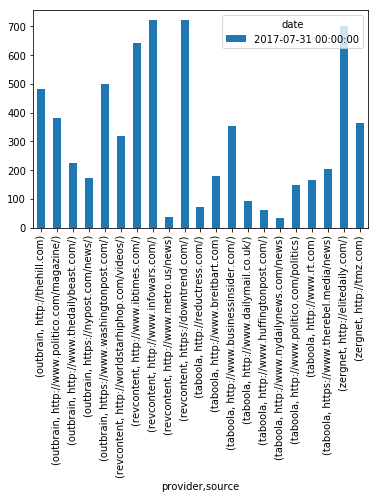

In [46]:
plt.show()

In [47]:
deduped['2017-06-01':'2017-06-30'].groupby(['provider', 'source']).resample('M').size().plot(kind='bar')

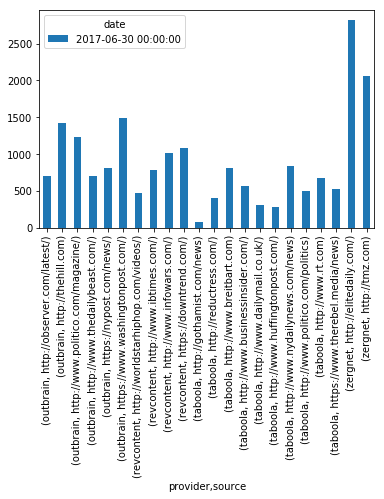

In [48]:
plt.show()

In [49]:
deduped['2017-05-01':'2017-05-31'].groupby(['provider', 'source']).resample('M').size().plot(kind='bar')

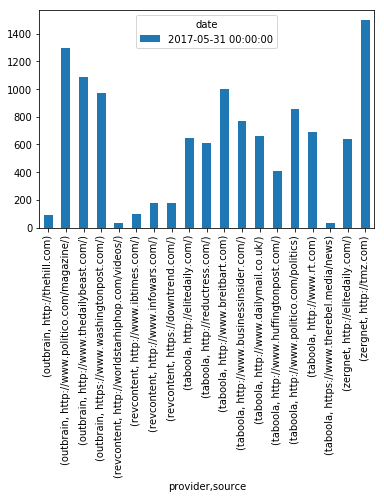

In [50]:
plt.show()

In [51]:
deduped['2017-04-01':'2017-04-30'].groupby(['provider', 'source']).resample('M').size().plot(kind='bar')

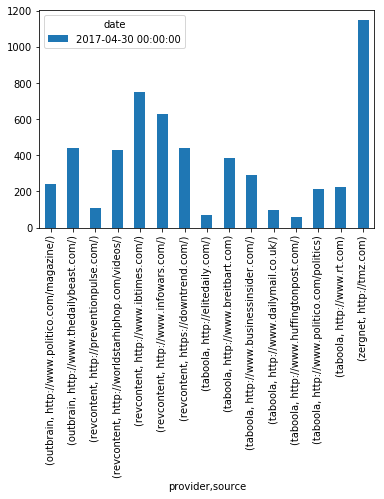

In [52]:
plt.show()

In [53]:
deduped['2017-03-27':'2017-03-31'].groupby(['provider', 'source']).resample('M').size().plot(kind='bar')

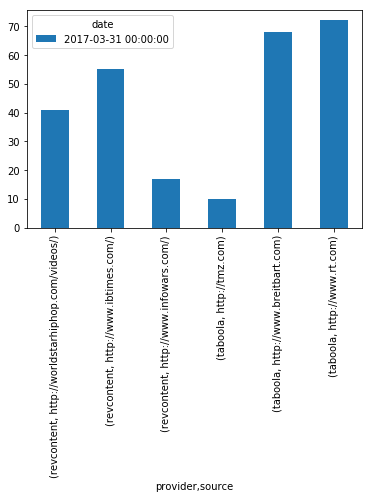

In [54]:
plt.show()

In [55]:
(deduped['2017-07-04':'2017-07-04'])['headline'].value_counts().nlargest(10)

Triple Your Accuracy With This Weird Shooting Technique Used By Seal Snipers    20
24 Times Lotto Winner: This Method Will Make You Win the Lotto Consistently     13
Steven Tyler's Car Is Far From What You'd Expect                                12
1 Odd Method Restores Eyes To 20/20 Vision (Try It Tonight)                     10
27 Stars Who Died And Not a Word Was Said                                       10
Disturbing Video Evidence Proves Obama Should Have Never Been President.        10
Goldman Sachs & World Bank Confirm: Us Dollar Will Be Worthless in 100 Days     10
28 Pictures That Show How Crazy Woodstock 1969 Was                              10
The Unusual Link Between Coconut Oil and Alzheimer's                            10
Born Before 1969? You Could Get an Extra $2,194 Monthly with This               10
Name: headline, dtype: int64

In [56]:
del deduped['_id']

In [57]:
timestamp = datetime.now().strftime('%Y-%m-%d-%H_%M')

In [58]:
datefile = '../data/out/{}_native_ad_data_deduped.csv'.format(timestamp)

In [59]:
deduped.to_csv(datefile, index=False)